In [3]:
# Welcome to your new notebook
# Type here in the cell editor to add code!


StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 5, Finished, Available, Finished)

In [4]:
IS_CUSTOM_DATA = False  # if TRUE, dataset has to be uploaded manually

DATA_ROOT = "/lakehouse/default"
DATA_FOLDER = "Files/churn"  # folder with data files
DATA_FILE = "churn.csv"  # data file name

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 6, Finished, Available, Finished)

In [5]:
import os, requests
if not IS_CUSTOM_DATA:
# Using synapse blob, this can be done in one line

# Download demo data files into lakehouse if not exist
    remote_url = "https://synapseaisolutionsa.blob.core.windows.net/public/bankcustomerchurn"
    file_list = [DATA_FILE]
    download_path = f"{DATA_ROOT}/{DATA_FOLDER}/raw"

    if not os.path.exists("/lakehouse/default"):
        raise FileNotFoundError(
            "Default lakehouse not found, please add a lakehouse and restart the session."
        )
    os.makedirs(download_path, exist_ok=True)
    for fname in file_list:
        if not os.path.exists(f"{download_path}/{fname}"):
            r = requests.get(f"{remote_url}/{fname}", timeout=30)
            with open(f"{download_path}/{fname}", "wb") as f:
                f.write(r.content)
    print("Downloaded demo data files into lakehouse.")

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 7, Finished, Available, Finished)

Downloaded demo data files into lakehouse.


In [6]:
from pathlib import Path

my_file = Path("/lakehouse/default/Files/churn/raw/churn.csv")
if my_file.is_file():
    print("file exists...")

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 8, Finished, Available, Finished)

file exists...


In [1]:
#read from files into a spark df 
df = (
    spark.read.option("header", True)
    .option("inferSchema", True)
    .csv("Files/churn/raw/churn.csv")
    .cache()
)

StatementMeta(, bf6f8ceb-d833-4ce4-96ec-a7b273bfc16c, 3, Finished, Available, Finished)

In [2]:
#convert to pandas df
df = df.toPandas()

StatementMeta(, bf6f8ceb-d833-4ce4-96ec-a7b273bfc16c, 4, Finished, Available, Finished)

In [4]:
#delta table for test
table_name = "df_customer"
# Create PySpark DataFrame from Pandas
df_customer=spark.createDataFrame(df)
df_customer.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark customer DataFrame saved to delta table: {table_name}")

StatementMeta(, bf6f8ceb-d833-4ce4-96ec-a7b273bfc16c, 6, Finished, Available, Finished)

Spark customer DataFrame saved to delta table: df_customer


In [3]:
df_customer = spark.read.format("delta").load("Tables/df_customer")

print("We have the df_customer data: ", df_customer.head(10))

StatementMeta(, cafa99ad-e763-4577-bece-099083f52bbe, 5, Finished, Available, Finished)

We have the df_customer data:  [Row(RowNumber=1251, CustomerId=15702789, Surname='Carter', CreditScore=548, Geography='Germany', Gender='Male', Age=32, Tenure=5, Balance=175214.71, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=155165.61, Exited=0), Row(RowNumber=1252, CustomerId=15814930, Surname='McGregor', CreditScore=588, Geography='Germany', Gender='Female', Age=40, Tenure=10, Balance=125534.51, NumOfProducts=1, HasCrCard=1, IsActiveMember=0, EstimatedSalary=121504.18, Exited=1), Row(RowNumber=1253, CustomerId=15658306, Surname='Lo', CreditScore=693, Geography='France', Gender='Male', Age=68, Tenure=4, Balance=97705.99, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=61569.07, Exited=0), Row(RowNumber=1254, CustomerId=15699523, Surname='Chu', CreditScore=499, Geography='Germany', Gender='Female', Age=55, Tenure=4, Balance=126817.65, NumOfProducts=2, HasCrCard=1, IsActiveMember=0, EstimatedSalary=123269.71, Exited=0), Row(RowNumber=1255, CustomerId=

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
import itertools

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 11, Finished, Available, Finished)

In [10]:
display(df, summary=True)

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 8e5867b7-5411-4651-a7cc-62165fd09cae)

In [11]:
# Modified version of code generated by Data Wrangler 
# Modification is to add in-place=True to each step

# Define a new function that include all above Data Wrangler operations
def clean_data(df):
    # Drop rows with missing data across all columns
    df.dropna(inplace=True)
    # Drop duplicate rows in columns: 'RowNumber', 'CustomerId'
    df.drop_duplicates(subset=['RowNumber', 'CustomerId'], inplace=True)
    # Drop columns: 'RowNumber', 'CustomerId', 'Surname'
    df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
    return df

df_clean = clean_data(df.copy())
df_clean.head()

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 13, Finished, Available, Finished)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Determine the dependent (target) attribute
dependent_variable_name = "Exited"
print(dependent_variable_name)
# Determine the categorical attributes
categorical_variables = [col for col in df_clean.columns if col in "O"
                        or df_clean[col].nunique() <=5
                        and col not in "Exited"]
print("Categories are: ", categorical_variables)
# Determine the numerical attributes
numeric_variables = [col for col in df_clean.columns if df_clean[col].dtype != "object"
                        and df_clean[col].nunique() >5]
print("Numerics are: ", numeric_variables)

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 14, Finished, Available, Finished)

Exited
Categories are:  ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Numerics are:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [17]:
print("The label: ", df_clean["Exited"].dtype)

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 19, Finished, Available, Finished)

The label:  int32


StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 22, Finished, Available, Finished)

/tmp/ipykernel_6058/1782353732.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


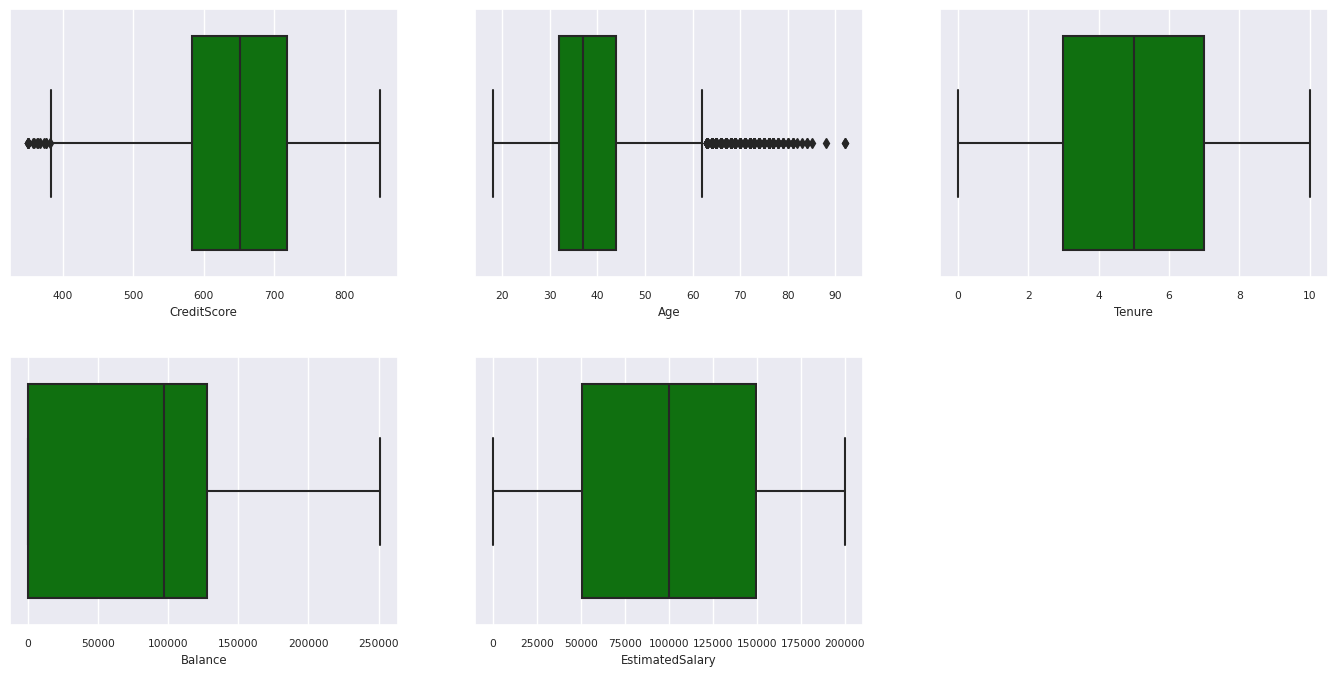

In [20]:
df_num_cols = df_clean[numeric_variables]
sns.set(font_scale = 0.7) 
fig, axes = plt.subplots(nrows = 2, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (17,8))
fig.tight_layout()
for ax,col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x = df_num_cols[col], color='green', ax = ax)
fig.delaxes(axes[1,2])

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 20, Finished, Available, Finished)

call countplot for each index


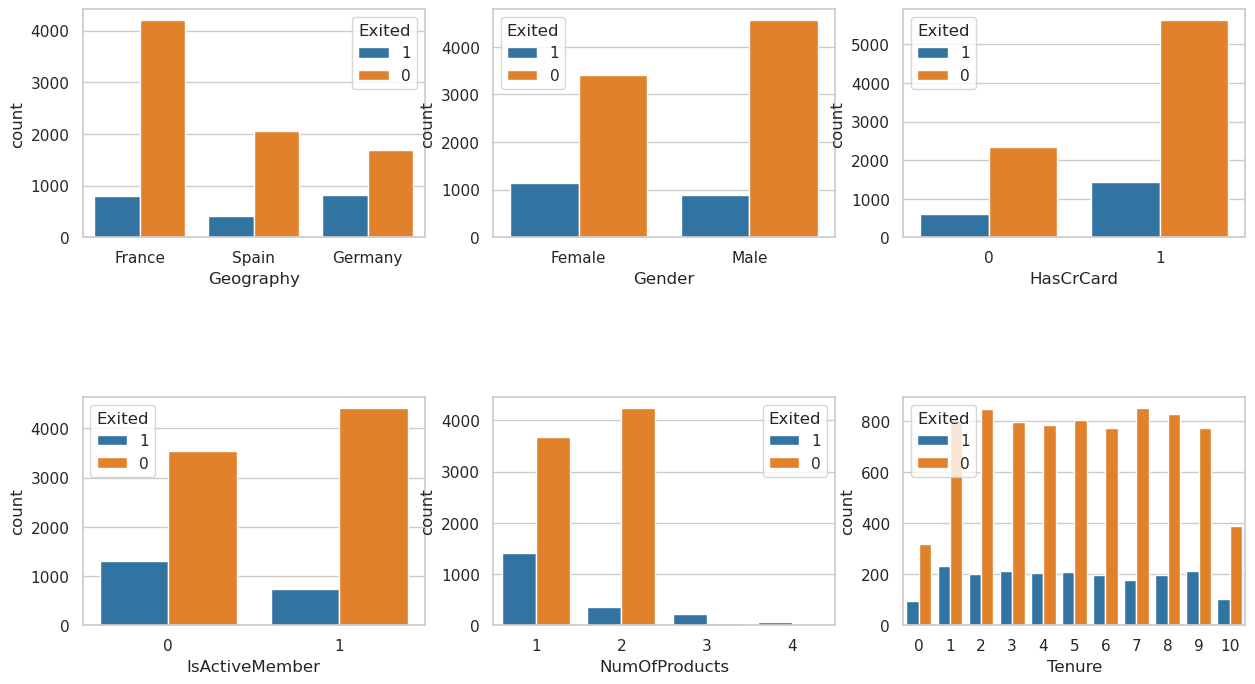

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

attr_list = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']
fig, axarr = plt.subplots(2, 3, figsize=(15, 8))  # Create a 2x3 grid of subplots

axarr = axarr.flatten()  # Flatten to 1D array to avoid indexing issues

print("call countplot for each index")
for ind, item in enumerate(attr_list):
    sns.countplot(x=item, hue=df['Exited'].astype(str), data=df_clean, ax=axarr[ind])  # Use 1D indexing

fig.subplots_adjust(hspace=0.7)  # Adjust spacing
plt.show()


StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 23, Finished, Available, Finished)

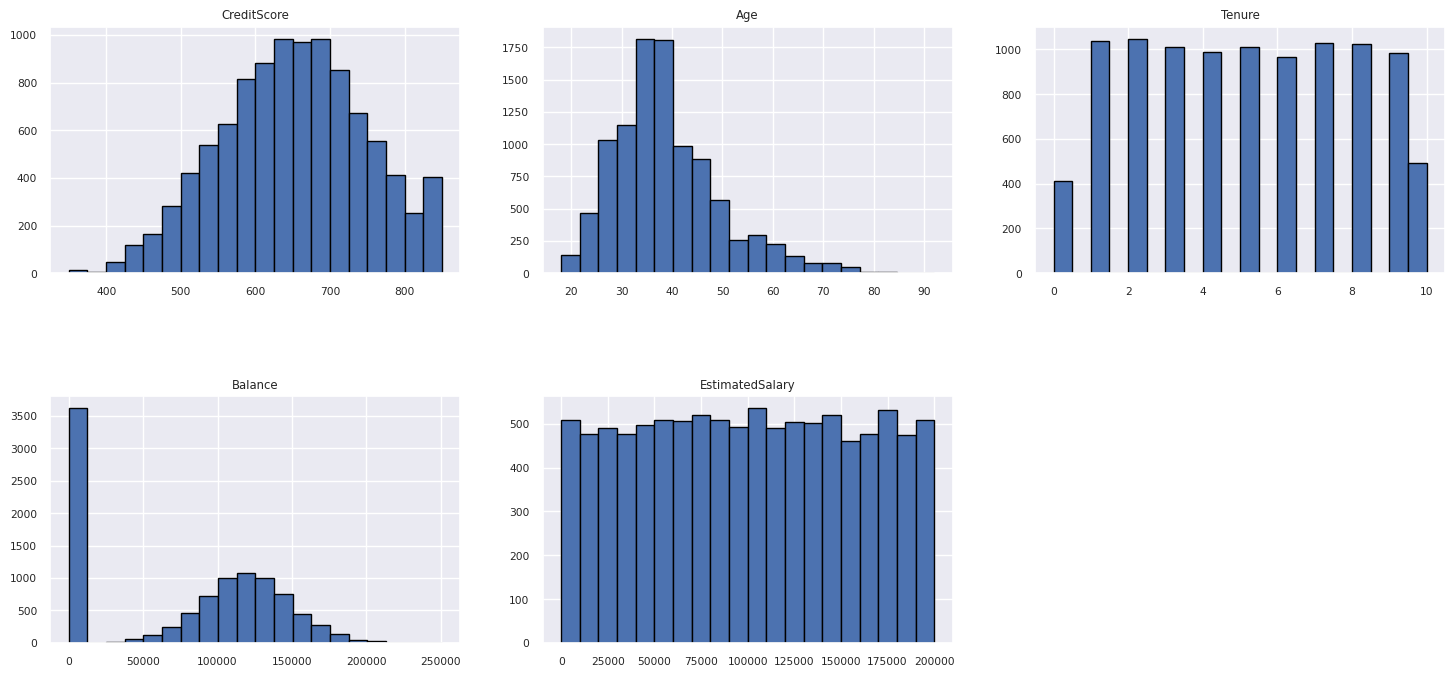

In [21]:
columns = df_num_cols.columns[: len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 8)
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2), 3, j+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    df_num_cols[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)
plt.show()

In [22]:
#generate new attributes as Feature Engineering
df_clean["NewTenure"] = df_clean["Tenure"]/df_clean["Age"]
df_clean["NewCreditsScore"] = pd.qcut(df_clean['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df_clean["NewAgeScore"] = pd.qcut(df_clean['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df_clean["NewBalanceScore"] = pd.qcut(df_clean['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df_clean["NewEstSalaryScore"] = pd.qcut(df_clean['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 24, Finished, Available, Finished)

In [23]:
# This is the same code that Data Wrangler will generate for one-hot encoding
 
import pandas as pd
 
def clean_data(df_clean):
    # One-hot encode columns: 'Geography', 'Gender'
    df_clean = pd.get_dummies(df_clean, columns=['Geography', 'Gender'])
    return df_clean
 
df_clean_1 = clean_data(df_clean.copy())
df_clean_1.head()

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 25, Finished, Available, Finished)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,False,False,True,True,False


In [24]:
#create a delta table for the cleansed data
table_name = "df_clean"
# Create Spark DataFrame from pandas
sparkDF=spark.createDataFrame(df_clean_1) 
sparkDF.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark dataframe saved to delta table: {table_name}")

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 26, Finished, Available, Finished)

Spark dataframe saved to delta table: df_clean


In [1]:
# Install imblearn for SMOTE using pip
! pip install imblearn

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 3, Finished, Available, Finished)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 155.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
#load the cleansed data from the lakehouse
import pandas as pd
SEED = 12345
df_clean = spark.read.format("delta").load("Tables/df_clean").toPandas()


StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 4, Finished, Available, Finished)

In [8]:
import mlflow
# Setup experiment name
EXPERIMENT_NAME = "bank-churn-trainning"  # MLflow experiment name

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 10, Finished, Available, Finished)

In [27]:
#create a new experiment if it doesn't exist
mlflow.set_experiment(EXPERIMENT_NAME)
mlflow.autolog(exclusive=False)

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 29, Finished, Available, Finished)

2025/04/10 17:36:32 INFO mlflow.tracking.fluent: Experiment with name 'bank-churn-trainning' does not exist. Creating a new experiment.
2025/04/10 17:36:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/10 17:36:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.


In [3]:
# Import the required libraries for model training
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score, classification_report

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 5, Finished, Available, Finished)

In [4]:
y = df_clean["Exited"]
X = df_clean.drop("Exited",axis=1)
# Split the dataset to 60%, 20%, 20% for training, validation, and test datasets
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
# Train-Validation Separation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=SEED)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 6, Finished, Available, Finished)

In [30]:
#delta table for test
table_name = "df_test"
# Create PySpark DataFrame from Pandas
df_test=spark.createDataFrame(X_test)
df_test.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark test DataFrame saved to delta table: {table_name}")

StatementMeta(, 53a37e6d-1174-4b70-8cfd-b14498364a87, 32, Finished, Available, Finished)

Spark test DataFrame saved to delta table: df_test


In [6]:
from imblearn.over_sampling import RandomOverSampler
    
    
# For RandomOverSampler
ros = RandomOverSampler(random_state=43)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 8, Finished, Available, Finished)

In [9]:
# lgbm_model
mlflow.lightgbm.autolog(registered_model_name='hj_lgbm_sm') # Register the trained model with autologging
lgbm_sm_model = LGBMClassifier(learning_rate = 0.07, 
                        max_delta_step = 2, 
                        n_estimators = 100,
                        max_depth = 10, 
                        eval_metric = "logloss", 
                        objective='binary', 
                        random_state=42)

with mlflow.start_run(run_name="hj_lgbm_sm_run") as run:
    lgbm_hj_sm_run_id = run.info.run_id # Capture run_id for model prediction later
    # lgbm_sm_model.fit(X_train,y_train) # Imbalanced training data
    lgbm_sm_model.fit(X_resampled_ros, y_resampled_ros.ravel()) # Balanced training data
    y_pred = lgbm_sm_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    cr_lgbm_sm = classification_report(y_val, y_pred)
    cm_lgbm_sm = confusion_matrix(y_val, y_pred)
    roc_auc_lgbm_sm = roc_auc_score(y_resampled_ros, lgbm_sm_model.predict_proba(X_resampled_ros)[:, 1])

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 11, Finished, Available, Finished)

2025/04/10 23:22:51 INFO mlflow.tracking.fluent: Experiment with name 'ModelDataScience' does not exist. Creating a new experiment.
2025/04/10 23:23:14 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp3foj0mi0/model, flavor: lightgbm). Fall back to return ['lightgbm==4.3.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
2025/04/10 23:23:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
Successfully registered model 'hj_lgbm_sm'.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4764, number of negative: 4764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 9528, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves 

In [10]:
# Define run_uri to fetch the model
# mlflow client: mlflow.model.url, list model

load_model_lgbm_hj_sm = mlflow.lightgbm.load_model(f"runs:/{lgbm_hj_sm_run_id}/model")
# Assess the performance of the loaded model on validation dataset

ypred_lgbm_hj_sm_v1 = load_model_lgbm_hj_sm.predict(X_val) # LightGBM

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 12, Finished, Available, Finished)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 13, Finished, Available, Finished)

In [11]:
# Directly assess the performance of the trained machine learning models on the validation dataset.
ypred_lgbm_hj_sm_v2 = lgbm_sm_model.predict(X_val) # LightGBM

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 14, Finished, Available, Finished)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 10})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 15, Finished, Available, Finished)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 16, Finished, Available, Finished)

[[1363  251]
 [ 130  256]]


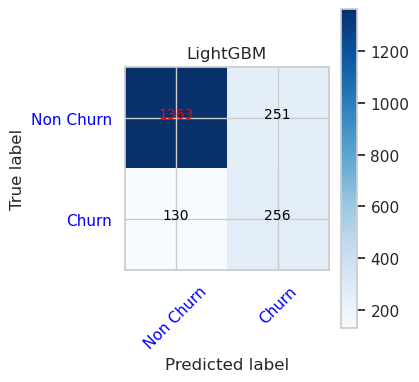

In [13]:
cfm = confusion_matrix(y_val, y_pred=ypred_lgbm_hj_sm_v1)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='LightGBM')
tn, fp, fn, tp = cfm.ravel()

# Score the trained model

In [14]:
df_test = spark.read.format("delta").load("Tables/df_test")
display(df_test)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 77fb11ac-54ca-4a94-ab65-4138cfcd1531)

### PREDICT with the Transformer API

To use the Transformer API from SynapseML, you'll need to first create an MLFlowTransformer object.

### Instantiate MLFlowTransformer object

The MLFlowTransformer object is a wrapper around the MLFlow model that you registered in Part 3. It allows you to generate batch predictions on a given DataFrame. To instantiate the MLFlowTransformer object, you'll need to provide the following parameters:

- The columns from the test DataFrame that you need as input to the model (in this case, you would need all of them).
- A name for the new output column (in this case, predictions).
- The correct model name and model version to generate the predictions (in this case, `lgbm_sm` and version 1).

In [15]:
from pyspark.sql.functions import col

df_test = df_test.select(
    [col(c).cast("double") if df_test.schema[c].dataType.simpleString() in ["boolean", "long"] else col(c)
     for c in df_test.columns]
)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 18, Finished, Available, Finished)

In [16]:
df_test.printSchema()

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 19, Finished, Available, Finished)

root
 |-- CreditScore: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- NewTenure: double (nullable = true)
 |-- NewCreditsScore: long (nullable = true)
 |-- NewAgeScore: long (nullable = true)
 |-- NewBalanceScore: long (nullable = true)
 |-- NewEstSalaryScore: long (nullable = true)
 |-- Geography_France: double (nullable = true)
 |-- Geography_Germany: double (nullable = true)
 |-- Geography_Spain: double (nullable = true)
 |-- Gender_Female: double (nullable = true)
 |-- Gender_Male: double (nullable = true)



In [19]:
from synapse.ml.predict import MLFlowTransformer

model = MLFlowTransformer(
    inputCols=list(df_test.columns),
    outputCol='predictions',
    modelName='hj_lgbm_sm',
    modelVersion=1
)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 22, Finished, Available, Finished)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.


StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 23, Finished, Available, Finished)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 24, Finished, Available, Finished)

StatementMeta(, ebffe613-785b-420a-ade7-e22ddbfe25a6, 9, Finished, Available, Finished)

No such comm: 7f13ac0d890f4c8bb2b5eb4da2c6e387
No such comm: 6f357f65139e4a54958633a4c0302bf2
No such comm: 5a1215e1f4494479b994ef7cecf4cff3
No such comm: 4d0ed57070a64f338e1a9afe0cd3f838
No such comm: e60edb02c216421b8d40a363306a53bc
No such comm: 2386411e97c14999a08ee6bb960cf997
No such comm: d4831ef808a54e88b5e62c50599a90b3
No such comm: 640c96c9251c4be7b2820d87ac5eb5db
No such comm: c4603e0b088e4c04b2d7e427554c5251
No such comm: de21cd18715d416f8a0b89d3cdaf3b25
No such comm: aae6767ba159433694269ba3298566d0
No such comm: 5544e365477d4bc89b2094a31d3bf3d0
No such comm: 9c3087bc4d4f4e4698b4f22b2cdda23d
No such comm: b4be32a1752e4dc5b1a23a41c096d407
No such comm: 417af14d0e10412db5a89152f78887e3
No such comm: 4b0b4cc4eb7e4e5296cc13ca3846eca5
No such comm: e47d1ee282394902a90002cc0506846c
No such comm: 5251c909c1214186ab9c11222328eae0
No such comm: 3ba28d87e9904de48f0147f89748d58e
No such comm: f0ed5f4f753945a092e7a98ec26fb3d7
No such comm: 27cdc0ed85e441c99a4205fd4555be3d
No such comm:

StatementMeta(, bf6f8ceb-d833-4ce4-96ec-a7b273bfc16c, 7, Finished, Available, Finished)

In [ ]:
Now that you have the MLFlowTransformer object, you can use it to generate batch predictions.

In [21]:
hjpredictions = model.transform(df_test)
display(hjpredictions)

StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 26, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 786159dc-7f7f-41e9-8d37-18bc00fdbde2)

In [ ]:
## Write model prediction results to the lakehouse

Once you have generated batch predictions, write the model prediction results back to the lakehouse.  

In [2]:
df_test = spark.read.format("delta").load("Tables/df_test").limit(200)

print("We have the df_test data: ", df_test.head(10))

StatementMeta(, cafa99ad-e763-4577-bece-099083f52bbe, 4, Finished, Available, Finished)

We have the df_test data:  [Row(CreditScore=701, Age=41, Tenure=2, Balance=0.0, NumOfProducts=1, HasCrCard=1, IsActiveMember=0, EstimatedSalary=47856.78, NewTenure=0.04878048780487805, NewCreditsScore=5, NewAgeScore=6, NewBalanceScore=2, NewEstSalaryScore=3, Geography_France=True, Geography_Germany=False, Geography_Spain=False, Gender_Female=True, Gender_Male=False), Row(CreditScore=594, Age=24, Tenure=0, Balance=97378.54, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=71405.17, NewTenure=0.0, NewCreditsScore=2, NewAgeScore=1, NewBalanceScore=3, NewEstSalaryScore=4, Geography_France=False, Geography_Germany=False, Geography_Spain=True, Gender_Female=True, Gender_Male=False), Row(CreditScore=511, Age=57, Tenure=8, Balance=122950.31, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=181258.76, NewTenure=0.14035087719298245, NewCreditsScore=1, NewAgeScore=8, NewBalanceScore=4, NewEstSalaryScore=10, Geography_France=False, Geography_Germany=False, Geography_S

In [23]:
# Save predictions to lakehouse to be used for generating a Power BI report
table_name = "customer_churn_test_predictions"
hjpredictions.write.format('delta').mode("overwrite").save(f"Tables/{table_name}")
print(f"Spark DataFrame saved to delta table: {table_name}")


StatementMeta(, 8884eb9e-fbdf-459d-bd86-09398225981d, 28, Finished, Available, Finished)

Spark DataFrame saved to delta table: customer_churn_test_predictions


In [7]:
print("HJ: ", notebookutils.fs.ls("file:/lakehouse/default/Tables"))

StatementMeta(, c4c3b029-9c2c-4729-b0b4-808bbe967a4b, 9, Finished, Available, Finished)

HJ:  [FileInfo(path=file:/lakehouse/default/Tables/customer_churn_test_predictions, name=customer_churn_test_predictions, size=4096), FileInfo(path=file:/lakehouse/default/Tables/df_clean, name=df_clean, size=4096), FileInfo(path=file:/lakehouse/default/Tables/df_test, name=df_test, size=4096)]


In [2]:
files = notebookutils.fs.ls("file:/lakehouse/default/Files/hjschema")
for file in files:
    print(file.name, file.isDir, file.isFile, file.path, file.size)

StatementMeta(, 71a80cf9-a247-4b08-8c4d-bd8444074491, 4, Finished, Available, Finished)

In [13]:
from pyspark.sql import SparkSession
import json
import os
from pathlib import Path

# Initialize Spark session
spark = SparkSession.builder.getOrCreate()

# Load the table
df = spark.read.table("df_test")

#print("datafram: ", df.head(20))

# Extract the schema in JSON format
schema_json = df.schema.json()
print(schema_json)
 

# Define the directory and file path
directory = "/lakehouse/default/Files/hjschema/"
file_path = os.path.join(directory, "file1.json")
my_file = Path(file_path)
if my_file.is_file():
    print("file exists...")

# Create the directory if it doesn't exist
#os.makedirs(directory, exist_ok=True)

# Save the schema to a file
#with open(file_path, "w") as f:
#    f.write(schema_json)

print(f"Schema saved in JSON format at {file_path}.")


with open('/lakehouse/default/Files/hjschema/file1.json','w') as f:
    json.dump(schema_json, f)

StatementMeta(, 71a80cf9-a247-4b08-8c4d-bd8444074491, 15, Finished, Available, Finished)

{"fields":[{"metadata":{},"name":"CreditScore","nullable":true,"type":"integer"},{"metadata":{},"name":"Age","nullable":true,"type":"integer"},{"metadata":{},"name":"Tenure","nullable":true,"type":"integer"},{"metadata":{},"name":"Balance","nullable":true,"type":"double"},{"metadata":{},"name":"NumOfProducts","nullable":true,"type":"integer"},{"metadata":{},"name":"HasCrCard","nullable":true,"type":"integer"},{"metadata":{},"name":"IsActiveMember","nullable":true,"type":"integer"},{"metadata":{},"name":"EstimatedSalary","nullable":true,"type":"double"},{"metadata":{},"name":"NewTenure","nullable":true,"type":"double"},{"metadata":{},"name":"NewCreditsScore","nullable":true,"type":"long"},{"metadata":{},"name":"NewAgeScore","nullable":true,"type":"long"},{"metadata":{},"name":"NewBalanceScore","nullable":true,"type":"long"},{"metadata":{},"name":"NewEstSalaryScore","nullable":true,"type":"long"},{"metadata":{},"name":"Geography_France","nullable":true,"type":"boolean"},{"metadata":{},"n

In [ ]:
abfss://313e1ba0-2c7b-4b58-b98e-818f457bf99c@onelake.dfs.fabric.microsoft.com/8830bd77-d12f-4e36-af7b-b6f47d23ee2e/Files